# Lagrangian trajectories in the Gulf Stream area

This is a first exploration.


In [1]:
# import libraries

%matplotlib inline
from glob import glob
import re
#from netCDF4 import Dataset
#import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import gsw

from clib.flow import *

In [2]:
# load grid info
grd = grid()

# output files
ofiles = sorted(glob(grd._datadir+'*avg*.nc'))

ds = xr.open_mfdataset(ofiles, concat_dim='time', compat='equals')
print(ds)

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
<xarray.Dataset>
Dimensions:     (auxil: 4, eta_rho: 1602, eta_v: 1601, s_rho: 50, s_w: 51, time: 1300, xi_rho: 2002, xi_u: 2001)
Coordinates:
  * time        (time) float64 6.48e+07 6.481e+07 6.481e+07 6.481e+07 ...
Dimensions without coordinates: auxil, eta_rho, eta_v, s_rho, s_w, xi_rho, xi_u
Data variables:
    time_step   (time, auxil) int32 dask.array<shape=(1300, 4), chunksize=(20, 4)>
    scrum_time  (time) float32 dask.array<shape=(1300,), chunksize=(20,)>
    zeta        (time, eta_rho, xi_rho) float32 dask.array<shape=(1300, 1602, 2002), chunksize=(20, 1602, 2002)>
    ubar        (time, eta_rho, xi_u) float32 dask.array<shape=(1300, 1602, 2001), chunksize=(20, 1602, 2001)>
    vbar        (time, eta_v, xi_rho) float32 dask.array<shape=(1300, 1601, 2002), chunksize=(20, 1

In [3]:
ldatadir = '/home/datawork-lops-osi/jgula/Cognac/north/'
lfiles = sorted(glob(ldatadir+'*.nc'))

# open files
lds = [xr.open_dataset(file) for file in lfiles]
print(lds[0])

<xarray.Dataset>
Dimensions:     (nq: 10037, time: 360)
Coordinates:
  * time        (time) float32 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 ...
Dimensions without coordinates: nq
Data variables:
    ocean_time  (time) float32 ...
    px          (time, nq) float64 ...
    py          (time, nq) float64 ...
    pt          (time, nq) float64 ...
    ps          (time, nq) float64 ...
    pu          (time, nq) float64 ...
    pv          (time, nq) float64 ...
    plon        (time, nq) float64 ...
    plat        (time, nq) float64 ...
    ptopo       (time, nq) float64 ...
    prho        (time, nq) float64 ...
    prho1       (time, nq) float64 ...
Attributes:
    description:  particles tracking
    simulation:   nesed_avg [0,10000,0,10000,[1,100,1]] 60
    sub:          360
    base:         0
    ng:           1
    x_periodic:   0
    y_periodic:   0
    depth:        0


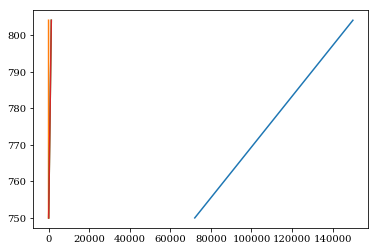

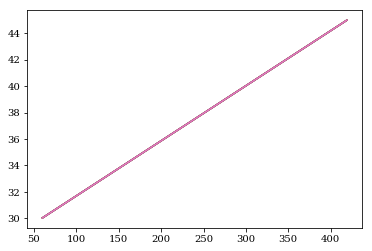

In [10]:
plt.figure()
plt.plot(ds.time_step , ds.time/86400.)

plt.figure()
for d in lds:
    plt.plot(d.time, d.ocean_time/86400.)

In [27]:
print(lds[0])
dt = lds[0].ocean_time[1]-lds[0].ocean_time[0]
print('dt = %.1f' %dt)
print('tmin = %.1f , tmax= %.1f' %(lds[0].ocean_time.min(),lds[0].ocean_time.max()) )

<xarray.Dataset>
Dimensions:     (nq: 10037, time: 360)
Coordinates:
  * time        (time) float32 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 ...
Dimensions without coordinates: nq
Data variables:
    ocean_time  (time) float32 2594000.0 2597600.0 2601200.0 2604800.0 ...
    px          (time, nq) float64 ...
    py          (time, nq) float64 ...
    pt          (time, nq) float64 ...
    ps          (time, nq) float64 ...
    pu          (time, nq) float64 ...
    pv          (time, nq) float64 ...
    plon        (time, nq) float64 -67.49 -67.48 -67.47 -67.46 -67.45 -67.43 ...
    plat        (time, nq) float64 39.77 39.77 39.78 39.78 39.78 39.79 39.79 ...
    ptopo       (time, nq) float64 ...
    prho        (time, nq) float64 ...
    prho1       (time, nq) float64 ...
Attributes:
    description:  particles tracking
    simulation:   nesed_avg [0,10000,0,10000,[1,100,1]] 60
    sub:          360
    base:         0
    ng:           1
    x_periodic:   0
    y_periodic:   0
  

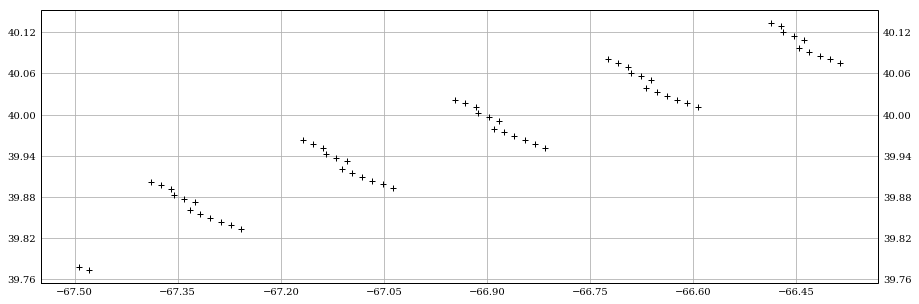

In [48]:
crs = ccrs.PlateCarree()

fig=plt.figure(figsize=(15,10))
#
ax=plt.axes(projection=crs)
#ax.set_extent(grd.hextent, crs)
gl=ax.gridlines(crs=crs,draw_labels=True)
gl.xlabels_top = False
ax.coastlines(resolution='50m')
#

lplt = lds[0].isel(nq=slice(1,1200,20)).isel(time=0)
#lplt = lds[0].isel(nq=slice(0,100)).isel(time=slice(0,24*1))
ax.plot(lplt.plon,lplt.plat,'k+', transform=crs)


---

## Temperature

To warm up we first look at temperature

---

In [15]:
# load temperature
T = ds['temp']
print(T)

<xarray.DataArray 'temp' (s_rho: 50, eta_rho: 1602, xi_rho: 2002)>
[160360200 values with dtype=float32]
Coordinates:
    time     float32 64802000.0
Dimensions without coordinates: s_rho, eta_rho, xi_rho
Attributes:
    long_name:      averaged potential temperature
    units:          Celsius
    field:          temperature, scalar, series
    standard_name:  sea_water_potential_temperature
    coordinates:    lat_rho lon_rho


---

## Horizontal map


Text(0.5,1,'surface temperature [degC]')

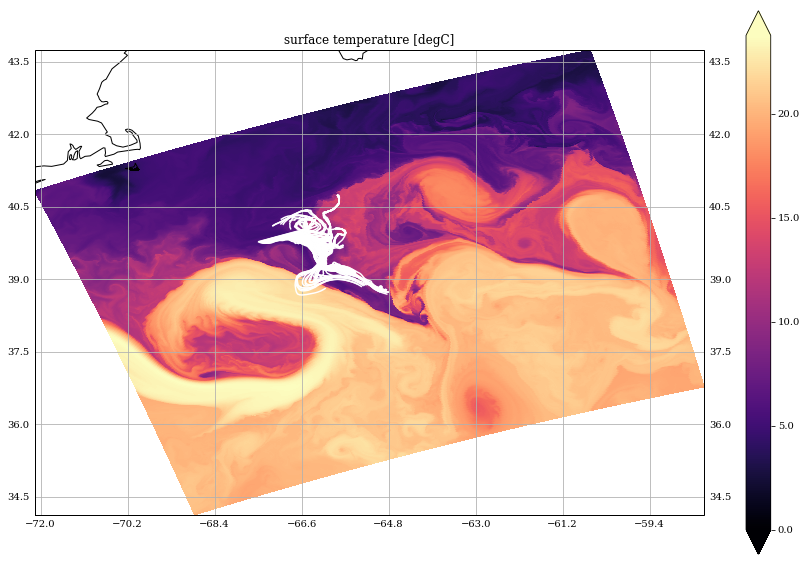

In [29]:
crs = ccrs.PlateCarree()

fig=plt.figure(figsize=(15,10))
#
ax=plt.axes(projection=crs)
ax.set_extent(grd.hextent, crs)
gl=ax.gridlines(crs=crs,draw_labels=True)
gl.xlabels_top = False
ax.coastlines(resolution='50m')
#
iz = -1
ilon = int(grd.Lp/2)  # used for vertical slices
toplt = T.isel(s_rho=iz)
# should probably mask T
cmap = plt.get_cmap('magma')
im = ax.pcolormesh(grd['lon_rho'],grd['lat_rho'],toplt,
                   vmin=toplt.min(),vmax=toplt.max(), 
                   cmap=cmap, transform=crs)
cbar = plt.colorbar(im, format='%.1f', extend='both')

lplt = lds[0].isel(nq=slice(0,100)).isel(time=slice(0,24*10))
ax.plot(lplt.plon,lplt.plat,'w', transform=crs)

ax.set_title('surface temperature [degC]')

#plt.savefig('figs/T_hmap.png',dpi=300)

---

## Vertical sections


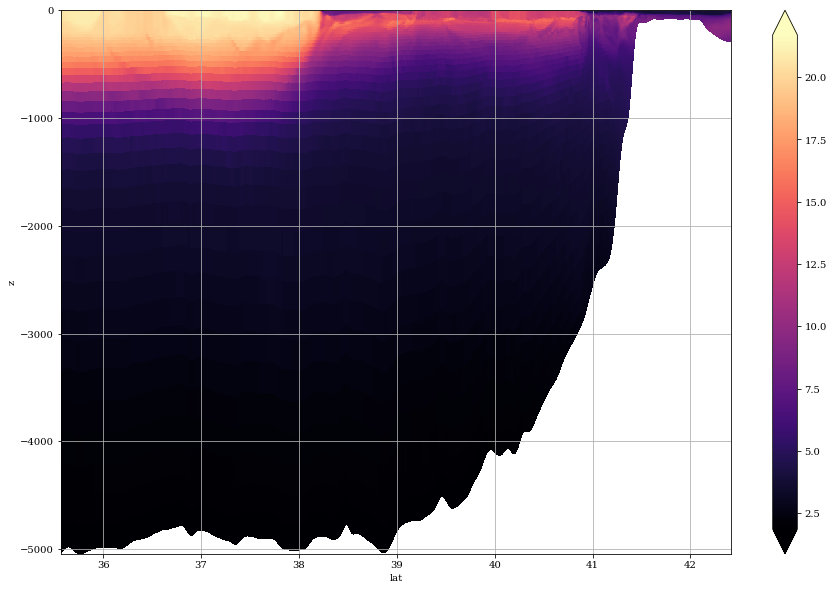

In [5]:
#ilon = grd.Lp/2
lat = grd['lat_rho'].isel(xi_rho = ilon)
h = grd['h'].isel(xi_rho=ilon)
zeta = ds['zeta'].isel(xi_rho = ilon)
z = grd.get_z(zeta, h)

plt.figure(figsize=(15,10))
ax=plt.subplot(111)
toplt = T.isel(xi_rho = ilon)
lat, z, toplt = xr.broadcast(lat, z, toplt)
im = ax.pcolormesh(lat, z, toplt, cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('z')
ax.grid(True)

#plt.savefig('figs/T_latz.png',dpi=300)


---

## Start looking at sound celerity now

---

In [6]:
# derive surface sound speed
S = ds['salt']
z = ds['temp'].isel(s_rho=-1) * 0.
c = get_soundc(T.isel(s_rho=-1), S.isel(s_rho=-1), z, grd['lon_rho'], grd['lat_rho'])

Text(0.5,1,'sound speed [m/s]')

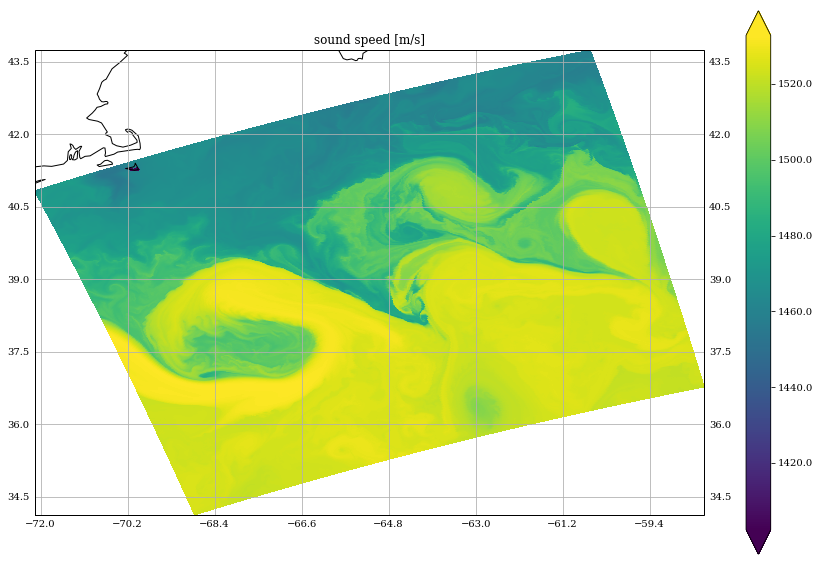

In [7]:
fig=plt.figure(figsize=(15,10))
#
ax=plt.axes(projection=crs)
ax.set_extent(grd.hextent, crs)
gl=ax.gridlines(crs=crs,draw_labels=True)
gl.xlabels_top = False
ax.coastlines(resolution='50m')
#
#it = 0
#iz = -1
#ilon = grd.Lp/2  # used for vertical slices
toplt = c
# should probably mask T
cmap = plt.get_cmap('viridis')
im = ax.pcolormesh(grd['lon_rho'],grd['lat_rho'],toplt,
                   vmin=toplt.min(),vmax=toplt.max(), 
                   cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_title('sound speed [m/s]')

#plt.savefig('figs/c_hmap.png',dpi=300)


---

### It is necessary to interpolate celerity on a uniform spatial grid

This is illustrated with the plot below which indicates variations of celerity at depth
that are not realistic.



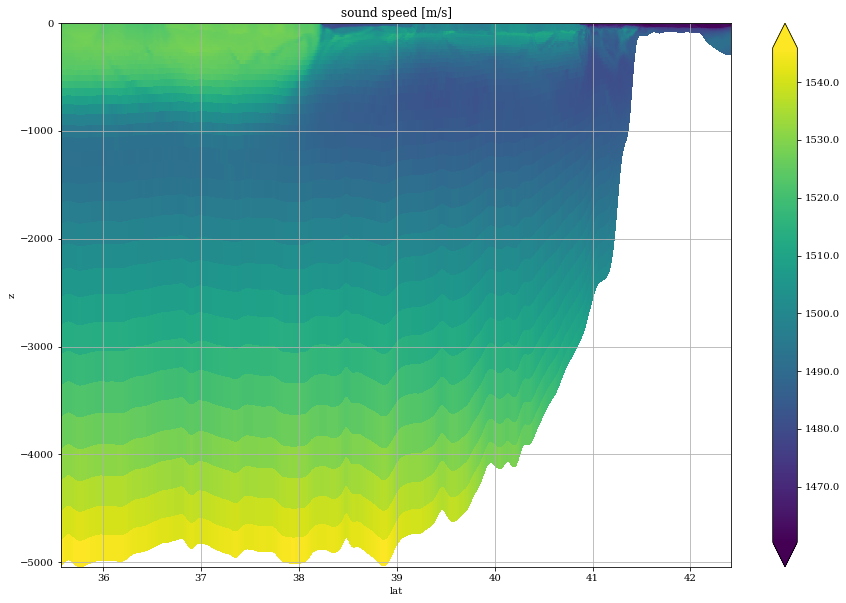

In [8]:
lon = grd['lon_rho'].isel(xi_rho=ilon)
lat = grd['lat_rho'].isel(xi_rho=ilon)
h = grd['h'].isel(xi_rho=ilon)
zeta = ds['zeta'].isel(xi_rho=ilon)
z = grd.get_z(zeta, h)
# derive surface sound speed
S = ds['salt']
c = get_soundc(T.isel(xi_rho=ilon).values, S.isel(xi_rho=ilon).values, 
               z.values, lon.values, lat.values)


plt.figure(figsize=(15,10))
ax=plt.subplot(111)
toplt = c
im = ax.pcolormesh(lat,z,toplt,cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('z')
ax.set_title('sound speed [m/s]')
ax.grid(True)

#plt.savefig('figs/T_latz.png',dpi=300)

---

Deep fluctuations of velocity disapear if temperature and salinity are first interpolated on a horizontal uniform vertical grid


In [9]:
lat.values[None,:].shape

(1, 1602)

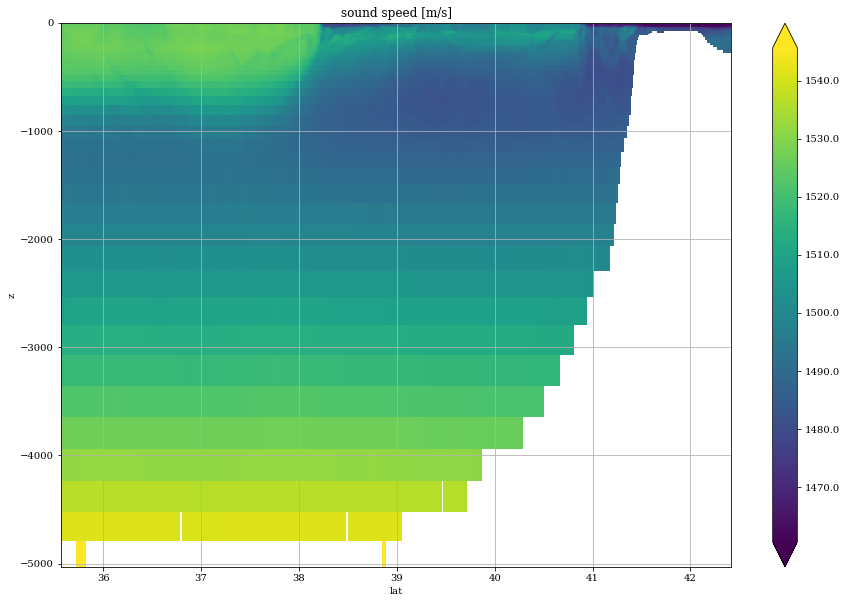

In [10]:
# interpolate on now a horizontally uniform grid

ilat=0
z_uni = z.isel(eta_rho=ilat).values
T_uni = interp2z(z_uni, z.values, T.isel(xi_rho=ilon).values)[:,:,0]
S_uni = interp2z(z_uni, z.values, S.isel(xi_rho=ilon).values)[:,:,0]
c_uni = get_soundc(T_uni, S_uni, z_uni[:,None], lon.values, lat.values)

plt.figure(figsize=(15,10))
ax=plt.subplot(111)
toplt = c_uni
im = ax.pcolormesh(lat,z_uni,toplt,cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('z')
ax.set_title('sound speed [m/s]')
ax.grid(True)


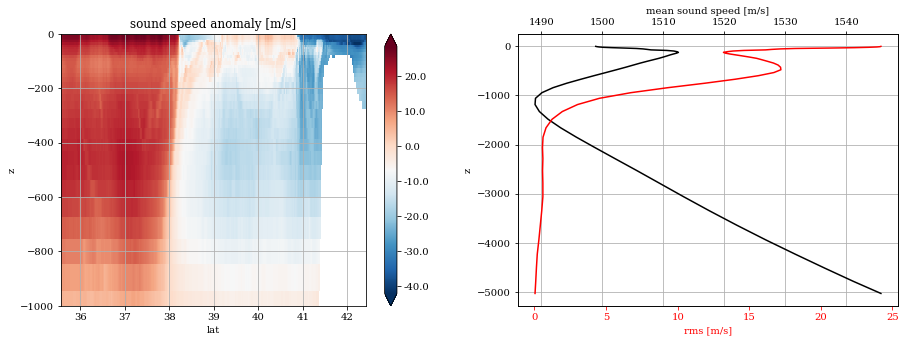

In [11]:
# show the anomaly with respect to the horizontally averaged profile

c_uni_mean = np.nanmean(c_uni,axis=1,keepdims=True)
c_uni_rms = np.nanstd(c_uni,axis=1,keepdims=True)

cmap = plt.get_cmap('RdBu_r')

plt.figure(figsize=(15,5))
ax=plt.subplot(121)
toplt = c_uni-c_uni_mean
im = ax.pcolormesh(lat,z_uni,toplt,cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('z')
ax.set_title('sound speed anomaly [m/s]')
ax.grid(True)
ax.set_ylim([-1000.,0.])

ax=plt.subplot(122)
ax.plot(c_uni_mean,z_uni,'k')
ax.set_ylabel('z')
#ax.set_title('sound speed, mean [m/s]')
ax.set_xlabel('mean sound speed [m/s]')
ax.grid(True)
ax.xaxis.set_label_position('top') 

ax2 = ax.twiny()
ax2.plot(c_uni_rms,z_uni,'r')
ax2.set_xlabel('rms [m/s]', color='r')
ax2.tick_params('x', colors='r')
ax2.xaxis.set_label_position('bottom') 
ax2.xaxis.tick_bottom()

ax.xaxis.tick_top()

#plt.savefig('figs/C_latz.png',dpi=300)

---

---

---